# Extracción de datos nacionales

In [75]:
%pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [80]:
from selenium import webdriver
from selenium.webdriver.common.by import By
driver = webdriver.Chrome()

In [81]:
driver.get("https://www.grupoaval.com/wps/portal/grupo-aval/aval/portal-financiero/renta-variable/acciones-bolsa-colombia/datos-historicos/!ut/p/a1/pdFPT4MwGAbwz-KBa_tuAxzHgvyPw4jMwWWpXdm6ACWAuI9vmUv0Ih7s7Ul-z_u2KS7wDhcNHcWRDkI2tJpyYe7XC3MZrHyIIXR0IA54fpJGkRWbCuQzAOBf_cBc_NV_xcUsmW4wB64rZkGq34AJVgirBKLEt5ZA4ofAesmMJLaNG4BfDgGcq2fef69YP9sukNRYOonnQmbqOJ1mnOlIL6jn3VjxAYmGVe8Hjlo6nPaiKSXONWjpkWvwJLtBkUD0g-wEk4Qx9V-8t7fOVvAPdDkNdTVNZLJG4q1GJWW8R-1XDdXywHE-Konz2MPFxtYgL1V4_BHaOtuBCM9GO24Ml9x9AgPrHx4!/dl5/d5/L2dBISEvZ0FBIS9nQSEh/pw/Z7_8162H3G0K8RBE0AS52COFE0U64/act/id=0/p=javax.servlet.include.path_info=QCPpageQCPPortletHistoricoAccionesBVCView.xhtml/572642306201/=/#Z7_8162H3G0K8RBE0AS52COFE0U64")

In [82]:
# Locating Ecopetrol´s link by its ID
link = driver.find_element(By.ID, "viewns_Z7_8162H3G0K8RBE0AS52COFE0U64_:ns_Z7_8162H3G0K8RBE0AS52COFE0U64_j_id339986189_1443c65f:33:ns_Z7_8162H3G0K8RBE0AS52COFE0U64_j_id339986189_1443c6ca")

link.click()

# selecting the date range
beginDate = driver.find_element(By.ID, "viewns_Z7_609I03O0JO1GC0A2BJI58920C1_:inputDateIni")
beginDate.clear() # clear the input field
beginDate.send_keys("01/02/24") # send the new date

endDate = driver.find_element(By.ID, "viewns_Z7_609I03O0JO1GC0A2BJI58920C1_:inputDateFin")
endDate.clear()
endDate.send_keys("01/03/24")

# clicking the submit button
submitButton = driver.find_element(By.ID, "viewns_Z7_609I03O0JO1GC0A2BJI58920C1_:ns_Z7_609I03O0JO1GC0A2BJI58920C1_j_id724755695_a2fe520")
submitButton.click()

In [89]:
# getting the table data
table = driver.find_element(By.ID, "viewns_Z7_609I03O0JO1GC0A2BJI58920C1_:ns_Z7_609I03O0JO1GC0A2BJI58920C1_j_id1095042852_97333e1")                      
table_rows = table.find_elements(By.TAG_NAME, "tr")      

list = []
dataFrame = []

for row in table_rows:
    table_data = row.find_elements(By.TAG_NAME, "td")
    if len(table_data) > 0: 
        for data in table_data:

            list.append(data.text)
    dataFrame.append(list)
    list = []
          
print(dataFrame)
 

[[], ['01/03/24', '2,240.00'], ['29/02/24', '2,290.00'], ['28/02/24', '2,300.00'], ['27/02/24', '2,360.00'], ['26/02/24', '2,345.00'], ['23/02/24', '2,330.00'], ['22/02/24', '2,340.00'], ['21/02/24', '2,330.00'], ['20/02/24', '2,280.00'], ['19/02/24', '2,270.00'], ['16/02/24', '2,305.00'], ['15/02/24', '2,295.00'], ['14/02/24', '2,275.00'], ['13/02/24', '2,275.00'], ['12/02/24', '2,310.00'], ['09/02/24', '2,315.00'], ['08/02/24', '2,340.00'], ['07/02/24', '2,365.00'], ['06/02/24', '2,355.00'], ['05/02/24', '2,320.00'], ['02/02/24', '2,320.00'], ['01/02/24', '2,345.00']]


In [84]:
import pandas as pd

In [90]:
df = pd.DataFrame(dataFrame, columns=['date', 'price'])

In [91]:
df.drop(df.index[0], inplace=True) # drop the first row - null row
df

,date,price
1,01/03/24,"2,240.00"
2,29/02/24,"2,290.00"
3,28/02/24,"2,300.00"
4,27/02/24,"2,360.00"
5,26/02/24,"2,345.00"
6,23/02/24,"2,330.00"
7,22/02/24,"2,340.00"
8,21/02/24,"2,330.00"
9,20/02/24,"2,280.00"
10,19/02/24,"2,270.00"


In [92]:
# Transforming price to float
df["price"] = df["price"].str.replace(",", "").astype(float)
df

,date,price
1,01/03/24,2240.0
2,29/02/24,2290.0
3,28/02/24,2300.0
4,27/02/24,2360.0
5,26/02/24,2345.0
6,23/02/24,2330.0
7,22/02/24,2340.0
8,21/02/24,2330.0
9,20/02/24,2280.0
10,19/02/24,2270.0


In [93]:
df.to_csv("dataCol.csv", index=False)

# USA stock price - yahoo finance

In [ ]:
pip install yfinance

In [94]:
import yfinance as yf

# Get the data for the stock EC (Ecopetrol)
data = yf.download('EC','2024-02-01','2024-03-01')

[*********************100%%**********************]  1 of 1 completed


In [95]:
print(data)

             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2024-02-01  12.17  12.43  11.94  12.10      12.10  2457900
2024-02-02  12.01  12.01  11.76  11.79      11.79  1713600
2024-02-05  11.76  11.82  11.55  11.72      11.72  1513300
2024-02-06  11.79  11.92  11.73  11.90      11.90  1592700
2024-02-07  11.90  11.99  11.82  11.98      11.98  1078300
2024-02-08  11.99  12.09  11.84  11.91      11.91  1438800
2024-02-09  11.91  11.96  11.78  11.87      11.87  1136200
2024-02-12  11.91  12.00  11.87  11.90      11.90  1342600
2024-02-13  11.84  11.88  11.58  11.65      11.65  1418300
2024-02-14  11.73  11.81  11.62  11.66      11.66   912800
2024-02-15  11.64  11.89  11.58  11.83      11.83  1677300
2024-02-16  11.82  11.89  11.73  11.86      11.86  1571000
2024-02-20  11.85  11.93  11.57  11.62      11.62  2216600
2024-02-21  11.69  11.91  11.65  11.91      11.91  1655400
2024-02-22  11.86  12.00  11.79  11.94      11.94  21502

In [96]:
df = pd.DataFrame(data)

In [97]:
# re formatinf date from 2024-02-01 to 01/02/24
df.index = df.index.strftime('%d/%m/%y')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01/02/24,12.17,12.43,11.94,12.10,12.10,2457900
02/02/24,12.01,12.01,11.76,11.79,11.79,1713600
05/02/24,11.76,11.82,11.55,11.72,11.72,1513300
06/02/24,11.79,11.92,11.73,11.90,11.90,1592700
07/02/24,11.90,11.99,11.82,11.98,11.98,1078300
08/02/24,11.99,12.09,11.84,11.91,11.91,1438800
09/02/24,11.91,11.96,11.78,11.87,11.87,1136200
12/02/24,11.91,12.00,11.87,11.90,11.90,1342600
13/02/24,11.84,11.88,11.58,11.65,11.65,1418300


In [98]:
# droping high, low, open and volume columns
df.drop(['High', 'Low', 'Open', 'Volume', 'Close'], axis=1, inplace=True) # this variables are not needed for the analysis

In [99]:
df.to_csv("dataUSA.csv")

# Stock price diference

In [111]:
dfCol = pd.read_csv("dataCol.csv")
dfUsa = pd.read_csv("dataUsa.csv")

In [119]:
dfCol['date'] = pd.to_datetime(dfCol['date'], format='%d/%m/%y')
dfUsa['Date'] = pd.to_datetime(dfUsa['Date'], format='%d/%m/%y')

In [101]:
# adjust adj close to colombian pesos 
# multiply adj close by the exchange rate (3.947,87 COP/USD)

dfUsa["Adj Close"] = dfUsa["Adj Close"] * 3947.87
dfUsa

,Date,Adj Close
0,01/02/24,47769.228506
1,02/02/24,46545.387149
2,05/02/24,46269.037454
3,06/02/24,46979.651494
4,07/02/24,47295.480793
5,08/02/24,47019.131098
6,09/02/24,46861.216448
7,12/02/24,46979.651494
8,13/02/24,45992.683994
9,14/02/24,46032.163598


In [127]:
# normalizing between -1 and 1 the price of the stocks
from sklearn.preprocessing import MinMaxScaler
# adj close and price adjustment
scaler = MinMaxScaler(feature_range=(-1, 1))
dfCol['price'] = scaler.fit_transform(dfCol[['price']])
dfUsa['Adj Close'] = scaler.fit_transform(dfUsa[['Adj Close']])

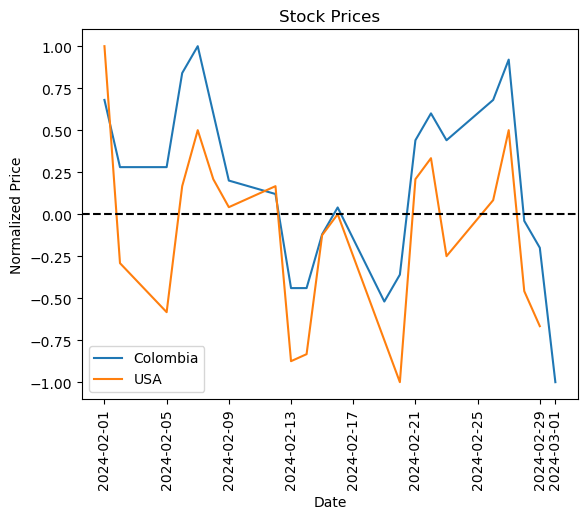

In [131]:
# plot the data usa and colombia stocks prices normalized by date
import matplotlib.pyplot as plt

plt.plot(dfCol['date'], dfCol['price'], label='Colombia')
plt.plot(dfUsa['Date'], dfUsa['Adj Close'], label='USA')
plt.xlabel('Date')
# vertical x label
plt.xticks(rotation=90)
plt.ylabel('Normalized Price')
plt.title('Stock Prices')
plt.legend()
plt.axhline(0, color='black', linestyle='--')
plt.show()
# make a horizonal line in 0 




In [132]:
# exporting normlized data
dfCol.to_csv("dataColNormalized.csv", index=False)
dfUsa.to_csv("dataUsaNormalized.csv", index=False)